In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, applications, callbacks
import matplotlib.pyplot as plt
import pathlib
import zipfile
import os

# ----------------------------
# Extract the ZIP File
# ----------------------------
zip_path = "/content/dataset.zip"  # Path for uploaded zip
extract_path = "/content/dataset" # Extract

# Unzip the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

Found 2000 files belonging to 9 classes.
Using 1600 files for training.
Found 2000 files belonging to 9 classes.
Using 400 files for validation.


Instructions for updating:
Use `tf.data.Dataset.sample_from_datasets(...)`.


Class names: ['BMW', 'Honda', 'MAZDA', 'MITSUBISHI', 'Mercedes Benz', 'Nissan', 'Perodua', 'Proton', 'Toyota']
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,423,113 (9.24 MB)

 Trainable params: 165,129 (645.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 706s 3s/step - accuracy: 0.3161 - loss: 1.8829 - val_accuracy: 0.5435 - val_loss: 1.2896
Epoch 2/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 741s 4s/step - accuracy: 0.6227 - loss: 1.0967 - val_accuracy: 0.5815 - val_loss: 1.1368
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.7534 - loss: 0.7430 - val_accuracy: 0.6196 - val_loss: 1.0586
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 679s 3s/step - accuracy: 0.8120 - loss: 0.5760 - val_accuracy: 0.6304 - val_loss: 1.0464
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.8750 - loss: 0.4221 - val_accuracy: 0.6250 - val_loss: 1.0612
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.8887 - loss: 0.3561 - val_accuracy: 0.6332 - val_loss: 1.0868
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 692s 3s/step - accuracy: 0.9161 - loss: 0.2796 - val_accuracy: 0.6223 - val_loss: 1.1107
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.9251 - loss: 0.2430 - val_accuracy: 0.6413 - val_loss: 1.1408
Epoch 9/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 682s 3s/step - accuracy: 0.9462 - loss: 0.1874 - val_accuracy: 0.657

Model saved as malaysia_car_model_balanced.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

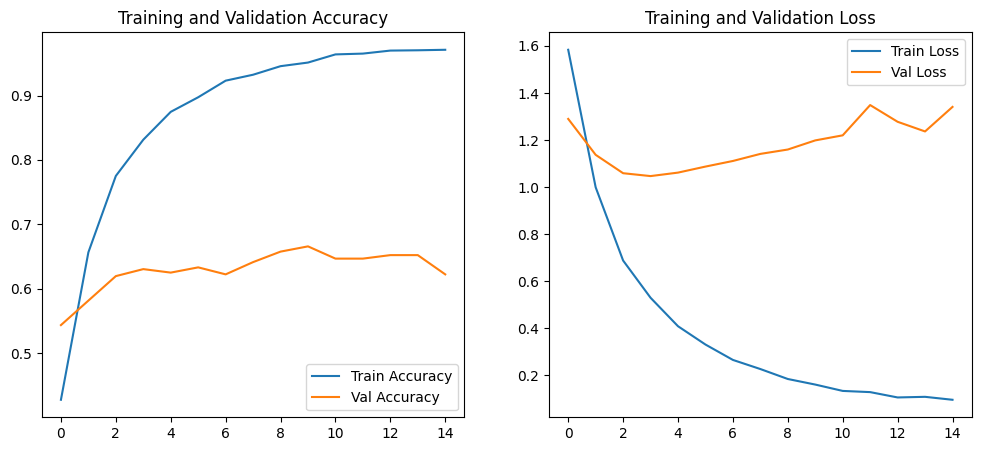

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential, applications, callbacks
import matplotlib.pyplot as plt
import pathlib
import os
# ------------------------------
# paths and parameters
# ------------------------------
data_dir = pathlib.Path('/content/dataset/dataset')
img_height, img_width = 224, 224  # MobileNetV2
batch_size = 32
epochs = 20
steps_per_epoch = 200
seed = 123

# ------------------------------
# original training and validation datasets
# ------------------------------
train_ds_orig = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='categorical')


# ------------------------------
#class names and number of classes
# ------------------------------
class_names = train_ds_orig.class_names
num_classes = len(class_names)
print("Class names:", class_names)

# ------------------------------
# for skiping the problematic images
# ------------------------------
train_ds_orig = train_ds_orig.ignore_errors()
val_ds = val_ds.ignore_errors()

# ------------------------------
# oversampling
# ------------------------------
train_ds_unbatched = train_ds_orig.unbatch()

class_datasets = []
for i in range(num_classes):
    ds_class = train_ds_unbatched.filter(lambda img, label: tf.argmax(label) == i).repeat()
    class_datasets.append(ds_class)

#Combine the per class datasets by sampling uniformal
balanced_train_ds = tf.data.experimental.sample_from_datasets(
    class_datasets, weights=[1.0/num_classes]*num_classes
)
balanced_train_ds = balanced_train_ds.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

#Optimize the validation dataset
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# ------------------------------
# data augmentation pipeline
# ------------------------------
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])

# ------------------------------
# MobileNetV2 model
# ------------------------------
base_model = applications.MobileNetV2(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base model

# ------------------------------
# complete model
# ------------------------------
model = Sequential([
    layers.InputLayer(input_shape=(img_height, img_width, 3)),
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Final layer
])


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# ------------------------------
# callbacks
# ------------------------------
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# ------------------------------
# train
# ------------------------------
history = model.fit(
    balanced_train_ds,
    validation_data=val_ds,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    callbacks=[early_stop]
)

# ------------------------------
# save
# ------------------------------
model.save("malaysia_car_model_balanced.h5")
print("Model saved as malaysia_car_model_balanced.h5")


from google.colab import files
files.download("malaysia_car_model_balanced.h5")

# ------------------------------
# Plot training & validation accuracy and loss
# ------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

from google.colab import files
files.download("malaysia_car_model_balanced.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


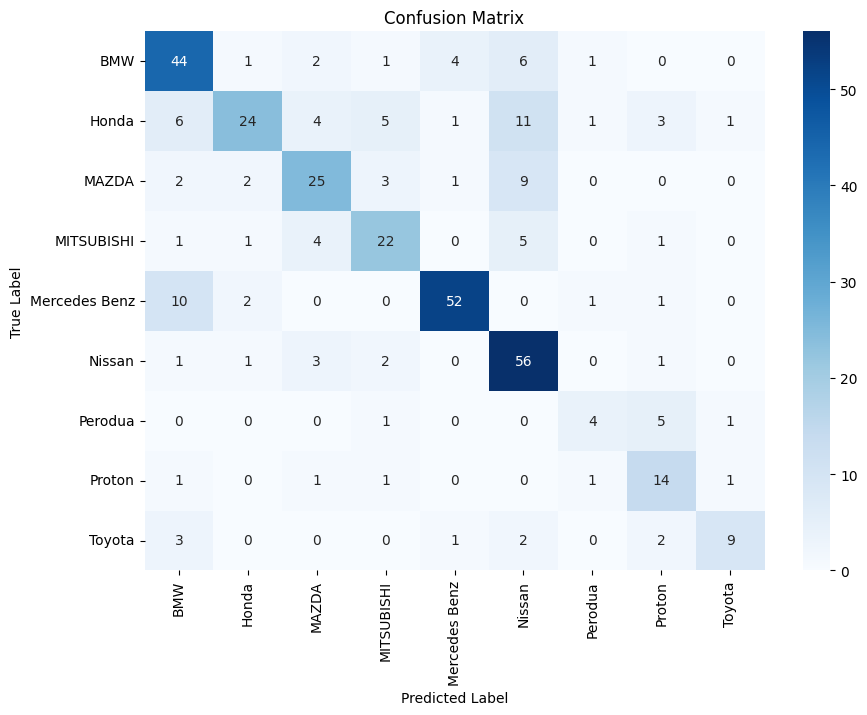

Classification Report:
                precision    recall  f1-score   support

          BMW       0.65      0.75      0.69        59
        Honda       0.77      0.43      0.55        56
        MAZDA       0.64      0.60      0.62        42
   MITSUBISHI       0.63      0.65      0.64        34
Mercedes Benz       0.88      0.79      0.83        66
       Nissan       0.63      0.88      0.73        64
      Perodua       0.50      0.36      0.42        11
       Proton       0.52      0.74      0.61        19
       Toyota       0.75      0.53      0.62        17

     accuracy                           0.68       368
    macro avg       0.66      0.63      0.63       368
 weighted avg       0.70      0.68      0.67       368



In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ------------------------------
# Loading model
# ------------------------------
model = tf.keras.models.load_model("malaysia_car_model_balanced.h5")

#model is compiled
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

# ------------------------------
# Extracting the class names
# ------------------------------
class_names = ['BMW', 'Honda', 'MAZDA', 'MITSUBISHI', 'Mercedes Benz', 'Nissan', 'Perodua', 'Proton', 'Toyota']
num_classes = len(class_names)

# ------------------------------
# Evaluate model on validation dataset
# ------------------------------
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# ------------------------------
# Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# Classification report
# ------------------------------
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os

# ------------------------------
# Converting h5 model to SavedMode
# ------------------------------
h5_model_path = "malaysia_car_model_balanced.h5"
saved_model_path = "malaysia_car_model"

if not os.path.exists(saved_model_path):
    model = load_model(h5_model_path)  # Load H5 model
    model.save(saved_model_path)  # Save in SavedModel format
    print("Model converted and saved in TensorFlow format")

# ------------------------------
# Load the model in TensorFlow SavedModel format
# ------------------------------
try:
    model = load_model(saved_model_path)
    print("Model loaded successfully!")
except Exception as e:
    print(f" rror loading model: {e}")

# ------------------------------
# Loading the  vlidation dataset for prediction
# ------------------------------
data_dir = pathlib.Path("/content/dataset/dataset")
img_height, img_width = 224, 224

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1,  # One image at a time for prediction
    label_mode="categorical"
)

#Geting class names
class_names = val_ds.class_names
print("Class Names:", class_names)

# ------------------------------
# Function to predict and display image
#------------------------------
def predict_and_display(dataset, model):
    for image, true_label in dataset.take(5):  #5 sample images
        img_array = tf.image.resize(image, (img_height, img_width)) / 255.0  # Normalize
        predictions = model.predict(img_array)
        predicted_label = class_names[np.argmax(predictions)]
        true_label_name = class_names[np.argmax(true_label)]

  #Plot the image with labels
        plt.figure(figsize=(4, 4))
        plt.imshow(image[0].numpy().astype("uint8"))  # Convert tensor to image
        plt.title(f"Predicted: {predicted_label}\nActual: {true_label_name}")
        plt.axis("off")
        plt.show()

#Run predictions on validation images
if "model" in locals():
    predict_and_display(val_ds, model)
else:
    print("Model not found. Please check the loading again")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Ensure model is initialized
dummy_input = tf.random.normal([1, 224, 224, 3])
_ = model(dummy_input)  # Forward pass

#Corrected feature extractor
feature_extractor = tf.keras.Model(
    inputs=model.inputs[0],
    outputs=model.layers[3].output
)

# Prepare dataset for feature extraction
features = []
labels = []
for images, lbls in val_ds.unbatch().take(500):  # Limit to 500 samples for PCA
    img_features = feature_extractor(np.expand_dims(images, axis=0))  # Extract features
    features.append(img_features.numpy().flatten())
    labels.append(np.argmax(lbls.numpy()))  # Convert one-hot labels to class indices

features = np.array(features)
labels = np.array(labels)

# Apply PCA -Reduce dimensions to 2D
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(label="Class Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Extracted Features")
plt.show()

# Explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.grid()
plt.show()
